## Import Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
df = pd.read_csv('Covid_patients.csv')
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


## Inspect the Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [4]:
# Check for missing values
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [5]:
# Check unique values
df.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

In [6]:
# Print unique values of all columns
exclude_col = 'DATE_DIED'

for col in df.columns:
    if col != exclude_col:
        print(f"Unique values in {col}: {df[col].unique()}\n")

Unique values in USMER: [2 1]

Unique values in MEDICAL_UNIT: [ 1  2  3  4  5  6  7  8  9 10 11 12 13]

Unique values in SEX: [1 2]

Unique values in PATIENT_TYPE: [1 2]

Unique values in INTUBED: [97  1  2 99]

Unique values in PNEUMONIA: [ 1  2 99]

Unique values in AGE: [ 65  72  55  53  68  40  64  37  25  38  24  30  48  23  80  61  54  59
  45  26  32  49  39  27  57  20  56  47  50  46  43  28  33  16  62  58
  36  44  66  52  51  35  19  90  34  22  29  14  31  42  15   1   0  17
  41   2  10  12  13   4   7   6   8  60   5  63  75  81  67  18  70  88
  85  92  73  74  78  76  82  77  86  71  95  87  83  84  79  69  89   3
  97  93 100  91  21 103  11   9  94  96 101 107 102  98  99 109 119 116
 105 104 111 114 120 106 108 110 118 117 121 115 113]

Unique values in PREGNANT: [ 2 97 98  1]

Unique values in DIABETES: [ 2  1 98]

Unique values in COPD: [ 2  1 98]

Unique values in ASTHMA: [ 2  1 98]

Unique values in INMSUPR: [ 2  1 98]

Unique values in HIPERTENSION: [ 1  2 98]


## Data Preprocessing

- In the Boolean features, 1 means "yes" and 2 means "no". Values as 97, 98, 99 are missing data.
- DATE_DIED: If the patient died indicate the date of death, and 9999-99-99 otherwise.

In [7]:
# Step 1: Replace missing values (97, 98, 99) with NaN
df.replace({97: np.nan, 98: np.nan, 99: np.nan}, inplace=True)

In [8]:
# Step 2: Handle DATE_DIED column
## Convert '9999-99-99' in date_died to NaN
df['DATE_DIED'] = df['DATE_DIED'].replace('9999-99-99', np.nan)

## Convert date_died to datetime format
df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'], errors='coerce')

## Create a new binary 'died' column: 1 if the patient died, 0 if the patient survived
df['DIED'] = df['DATE_DIED'].notna().astype(int)

In [9]:
# View the clean dataset
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   USMER                 1048575 non-null  int64         
 1   MEDICAL_UNIT          1048575 non-null  int64         
 2   SEX                   1048575 non-null  int64         
 3   PATIENT_TYPE          1048575 non-null  int64         
 4   DATE_DIED             30492 non-null    datetime64[ns]
 5   INTUBED               192706 non-null   float64       
 6   PNEUMONIA             1032572 non-null  float64       
 7   AGE                   1048230 non-null  float64       
 8   PREGNANT              521310 non-null   float64       
 9   DIABETES              1045237 non-null  float64       
 10  COPD                  1045572 non-null  float64       
 11  ASTHMA                1045596 non-null  float64       
 12  INMSUPR               1045171 non-null  fl

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DIED
0,2,1,1,1,2020-03-05,NaN,1.0,65.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1
1,2,1,2,1,2020-03-06,NaN,1.0,72.0,NaN,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN,1
2,2,1,2,2,2020-09-06,1.0,2.0,55.0,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
3,2,1,1,1,2020-12-06,NaN,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,1
4,2,1,2,1,NaT,NaN,2.0,68.0,NaN,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,0


# 📊 Patient Demographics 📊

## Data Distribution

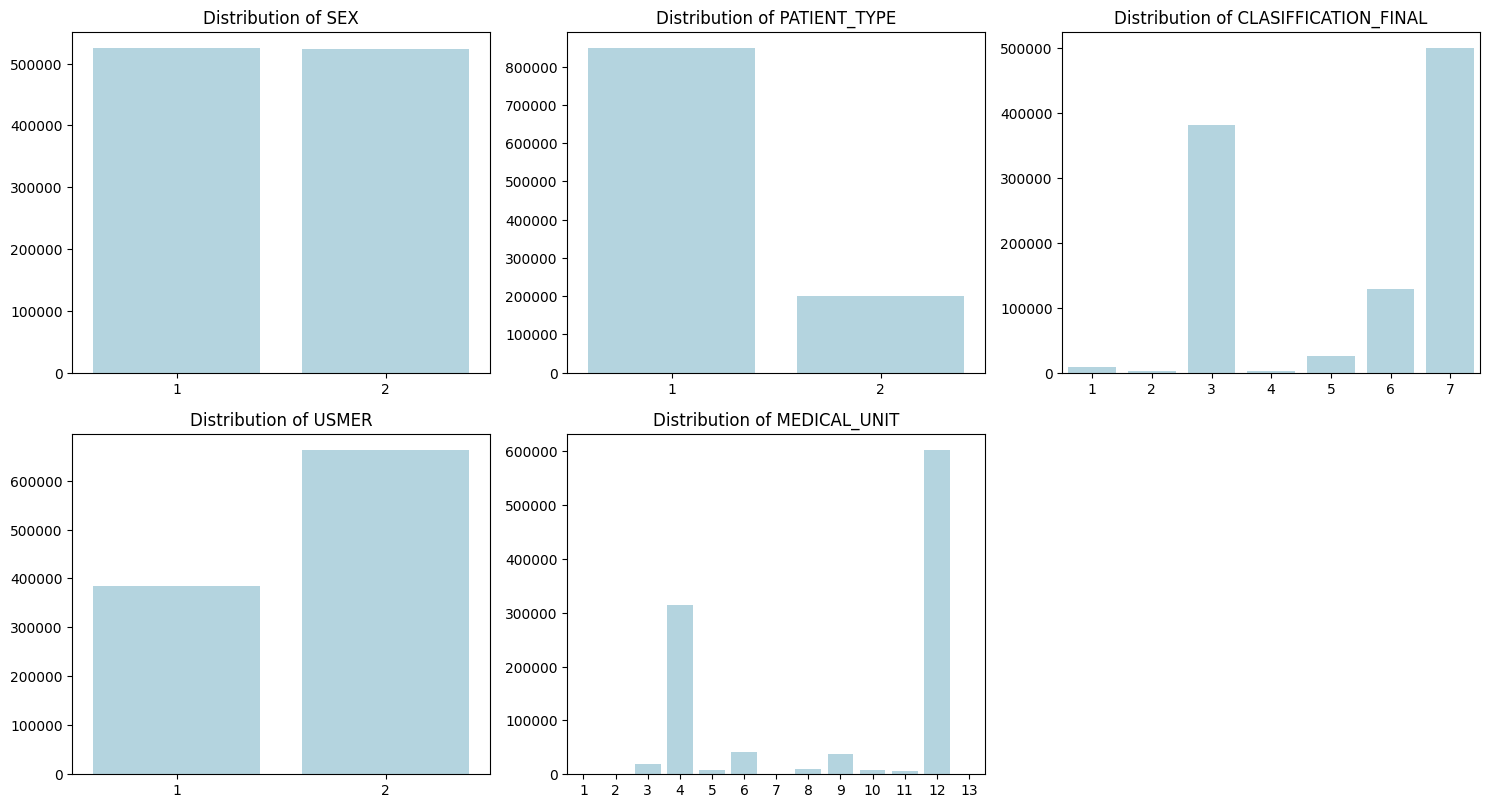

In [10]:
df_copy = df.copy()

# Map boolean columns to "Yes" and "No"
boolean_columns = ['INTUBED', 'PNEUMONIA', 'PREGNANT', 
                   'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 
                   'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 
                   'TOBACCO',  'ICU']

# Map 1 to 'Yes' and 2 to 'No'
df_copy[boolean_columns] = df_copy[boolean_columns].replace({1: 'Yes', 2: 'No'})

# Plot categorical columns using bar charts
plt.figure(figsize=(15, 20))
categorical_cols = ['SEX', 'PATIENT_TYPE', 'CLASIFFICATION_FINAL', 'USMER', 'MEDICAL_UNIT']

for i, col in enumerate(categorical_cols):
    plt.subplot(5, 3, i + 1)  # Creates a grid with 5 rows and 3 columns
    sns.countplot(x=df_copy[col], color = 'lightblue')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=0)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

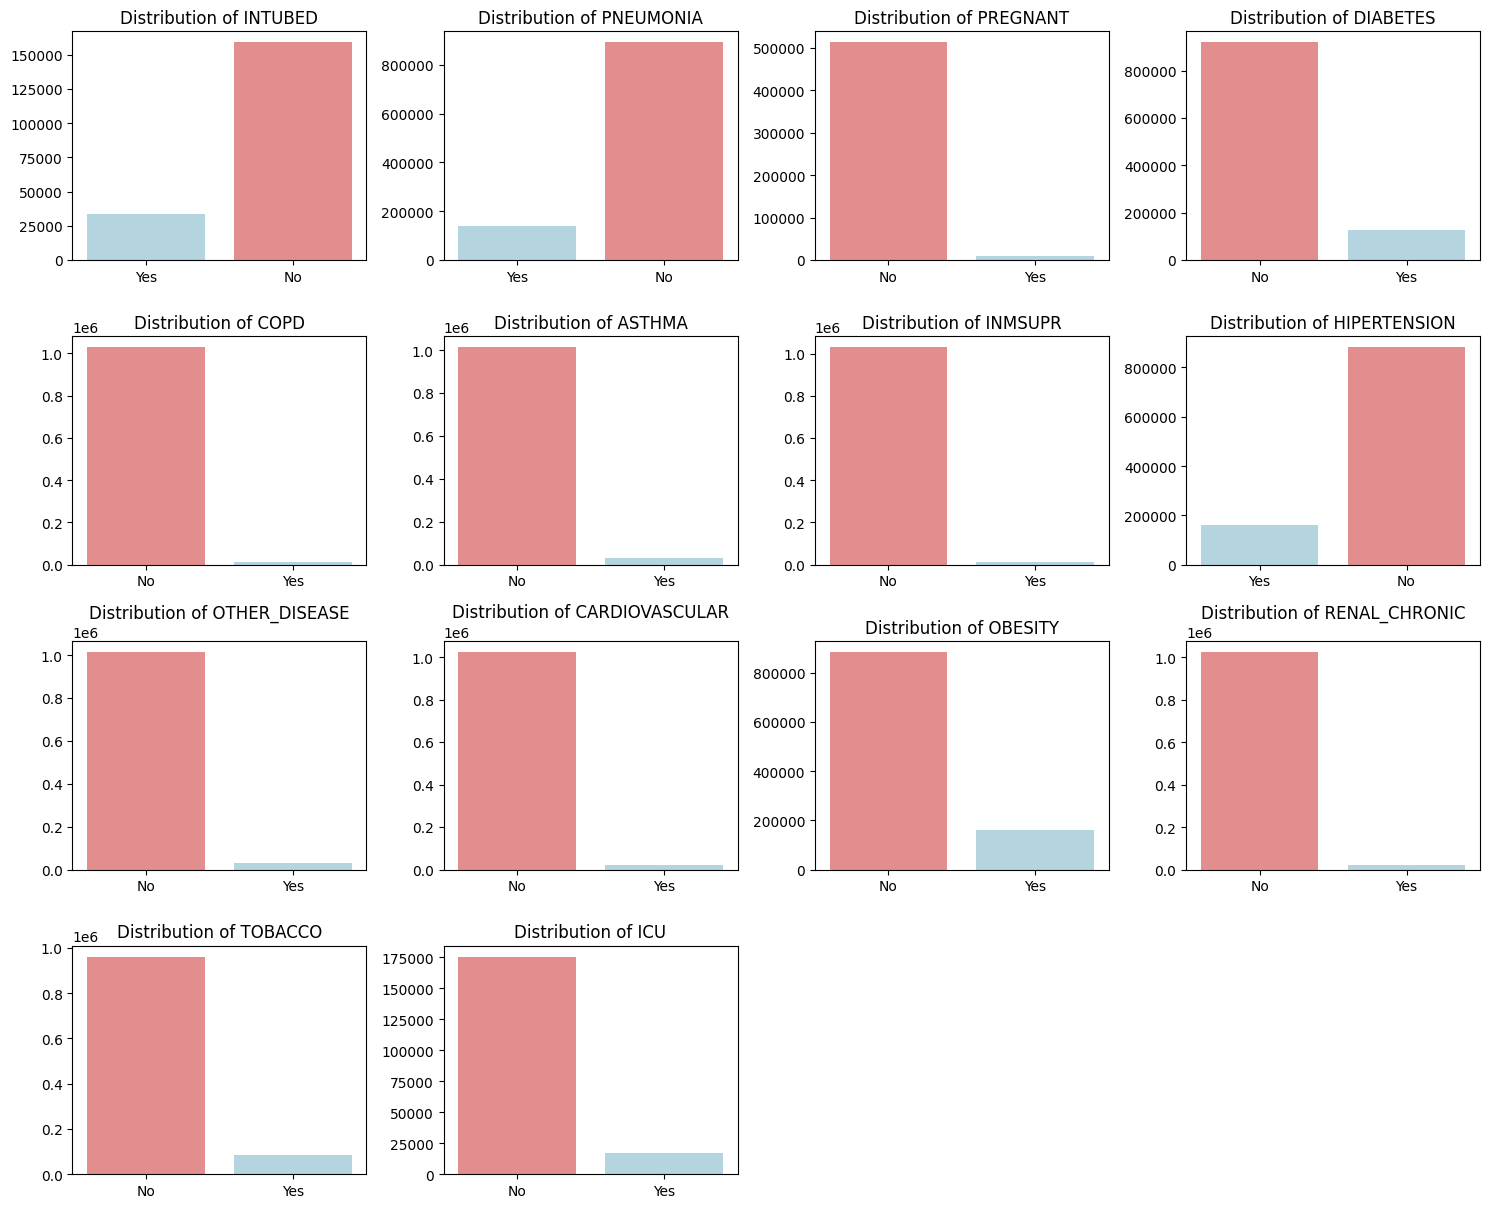

In [11]:
# Plot the distribution of boolean columns
plt.figure(figsize=(15, 15))

for i, col in enumerate(boolean_columns):
    plt.subplot(5, 4, i + 1)  # Creates a grid with 5 rows and 4 columns
    sns.countplot(x=df_copy[col], palette={'Yes': 'lightblue', 'No': 'lightcoral'})
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=0)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

plt.show()

## Age distribution

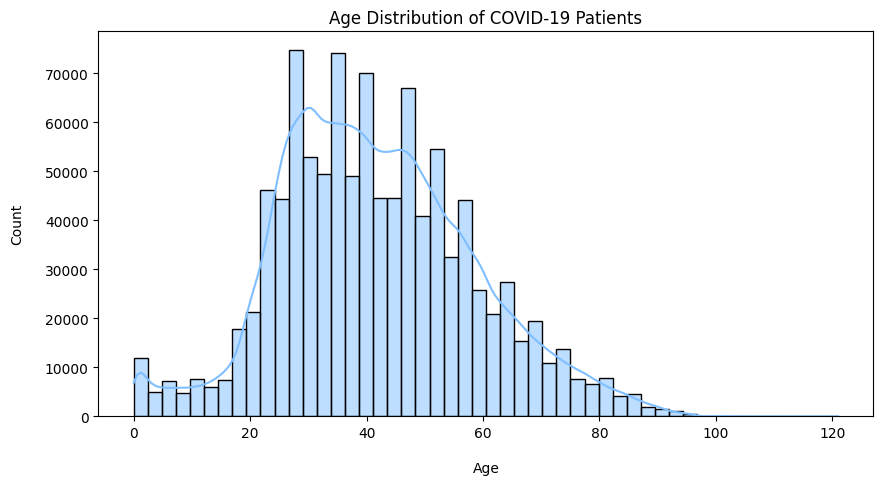

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(df['AGE'], bins=50, kde=True, color = "#7fbfff")

plt.title("Age Distribution of COVID-19 Patients")
plt.xlabel("Age", labelpad = 15)
plt.ylabel("Count", labelpad = 15)

plt.show()

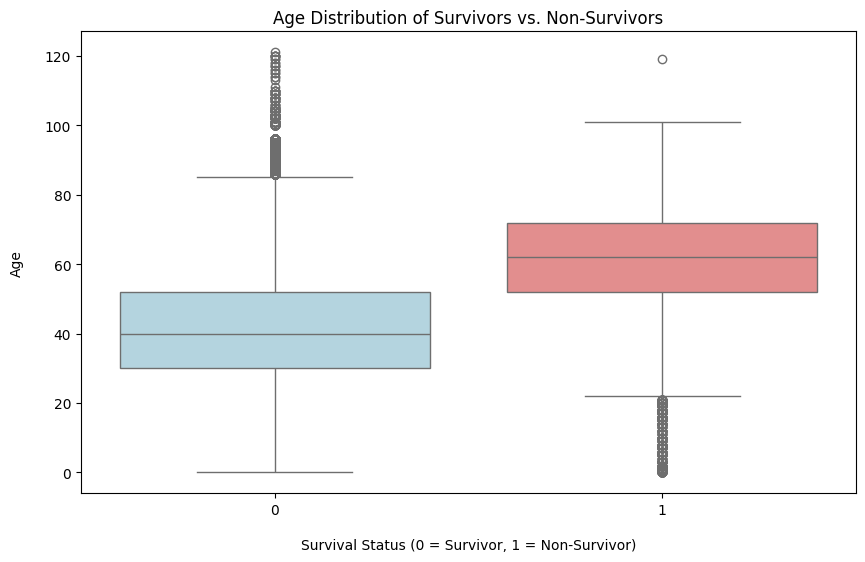

In [13]:
# Age distribution of Survivors vs. Non-Survivors
plt.figure(figsize=(10, 6))
sns.boxplot(x='DIED', y='AGE', data=df, palette={"0": 'lightblue', "1": 'lightcoral'}) 

plt.title("Age Distribution of Survivors vs. Non-Survivors")
plt.xlabel("Survival Status (0 = Survivor, 1 = Non-Survivor)", labelpad=15)
plt.ylabel("Age", labelpad=15)

plt.show()

## Gender Distribution of Survivors vs. Non-Survivors

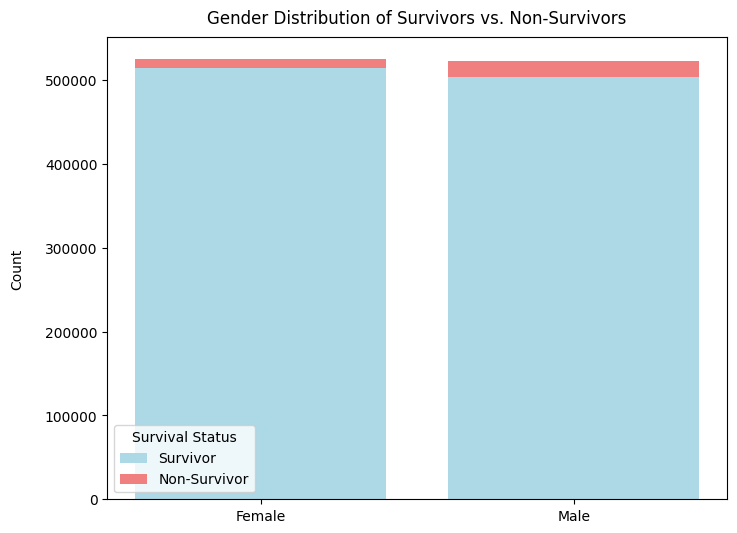

In [14]:
# Count survivors and non-survivors for each gender
gender_counts = df.groupby('SEX')['DIED'].value_counts().unstack()

# Define labels for gender categories
gender_labels = ['Female', 'Male']

# Define bar colors: Blue for survivors, red for non-survivors
colors = ['lightblue', 'lightcoral']

# Plot stacked bars
plt.figure(figsize=(8, 6))
plt.bar(gender_labels, gender_counts[0], color=colors[0], label='Survivor')
plt.bar(gender_labels, gender_counts[1], bottom=gender_counts[0], color=colors[1], label='Non-Survivor')

plt.title("Gender Distribution of Survivors vs. Non-Survivors", pad=10)
plt.xlabel("")
plt.ylabel("Count", labelpad = 15)
plt.legend(title="Survival Status")

plt.show()

# 📊 Feature Relationships 📊

## Correlation Analysis

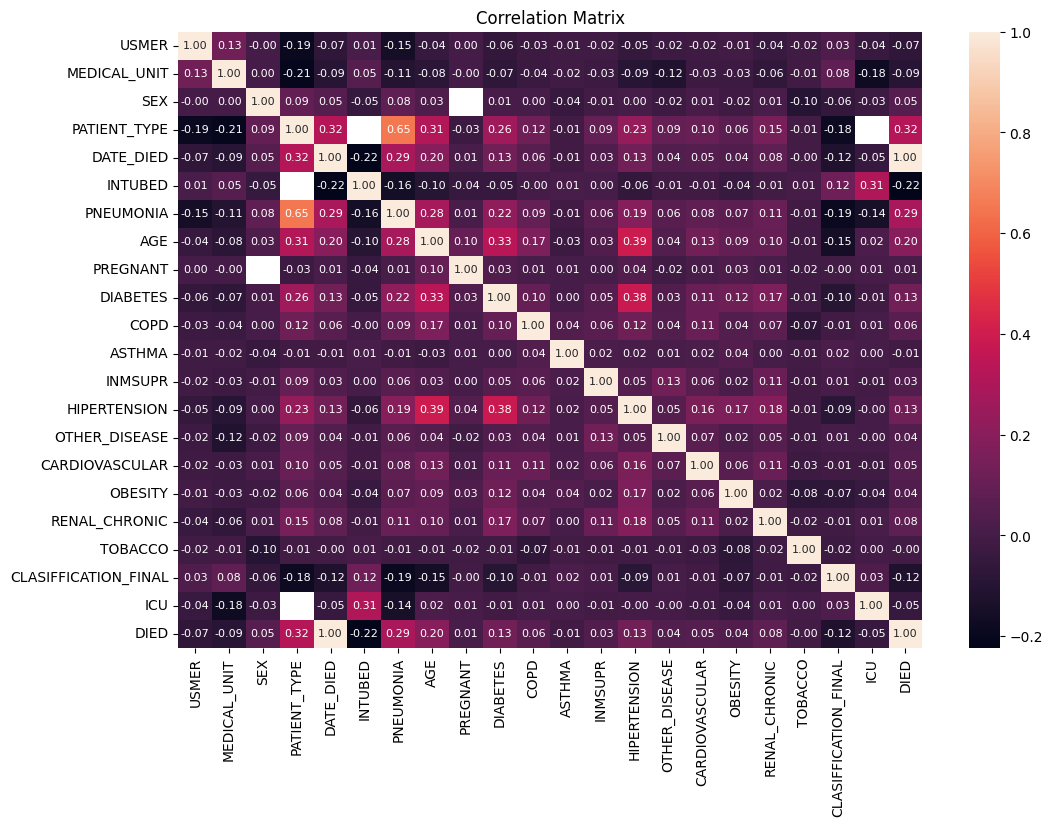

In [42]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='rocket', fmt=".2f", annot_kws={"size": 8})
plt.title("Correlation Matrix")
plt.show()

## Scatter Plot: Age vs. Survival

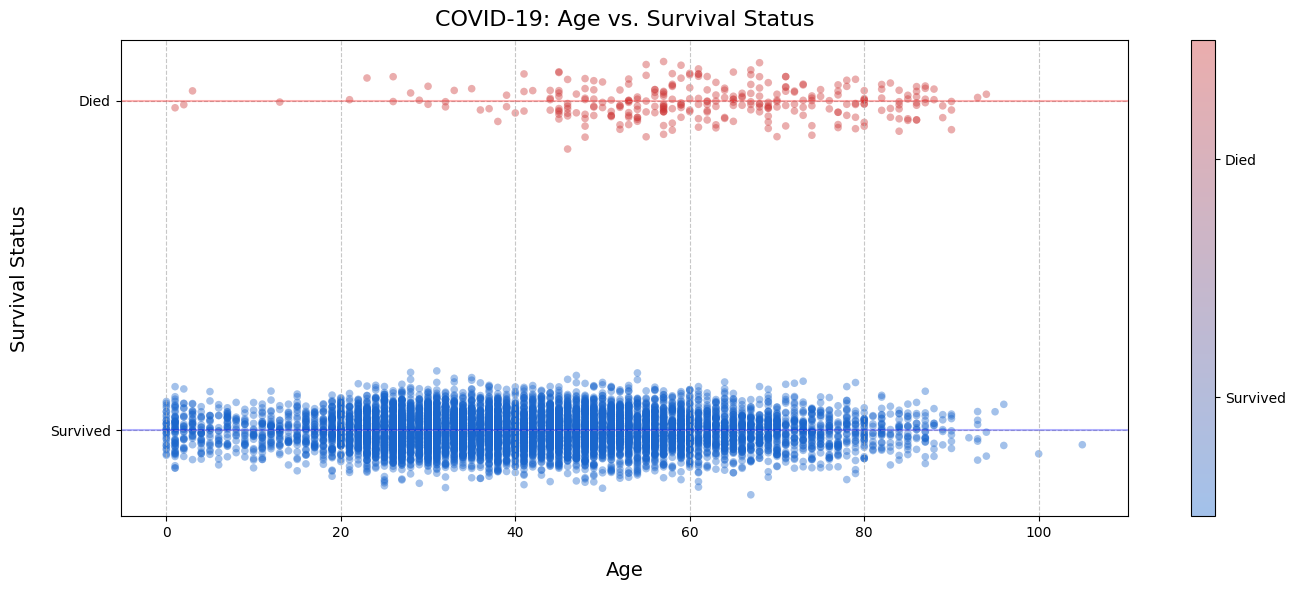

In [16]:
plot_df = df.copy()

# Add jitter to the DIED values
plot_df['DIED_jitter'] = plot_df['DIED'] + np.random.normal(0, 0.05, size=len(plot_df))

# Create custom colormap
colors = [(0.1, 0.4, 0.8), (0.8, 0.2, 0.2)]
cmap = LinearSegmentedColormap.from_list("survival_cmap", colors, N=100)

# Create the scatter plot
plt.figure(figsize=(14, 6))
sample_size = min(10000, len(plot_df))
sample_df = plot_df.sample(sample_size, random_state=42)

scatter = plt.scatter(
    sample_df['AGE'],
    sample_df['DIED_jitter'],
    c=sample_df['DIED'],
    cmap=cmap,
    alpha=0.4,
    s=30,
    edgecolor='none'
)

cbar = plt.colorbar(scatter)
cbar.set_ticks([0.25, 0.75])
cbar.set_ticklabels(['Survived', 'Died'])

plt.axhline(y=0, color='blue', linestyle='-', alpha=0.3)
plt.axhline(y=1, color='red', linestyle='-', alpha=0.3)

plt.title('COVID-19: Age vs. Survival Status', fontsize=16, pad=10)
plt.xlabel('Age', fontsize=14, labelpad=15)
plt.ylabel('Survival Status', fontsize=14, labelpad=15)
plt.yticks([0, 1], ['Survived', 'Died'])
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 📊 Analyzing Comorbidities 📊

## Distribution of Patients with Medical Condition

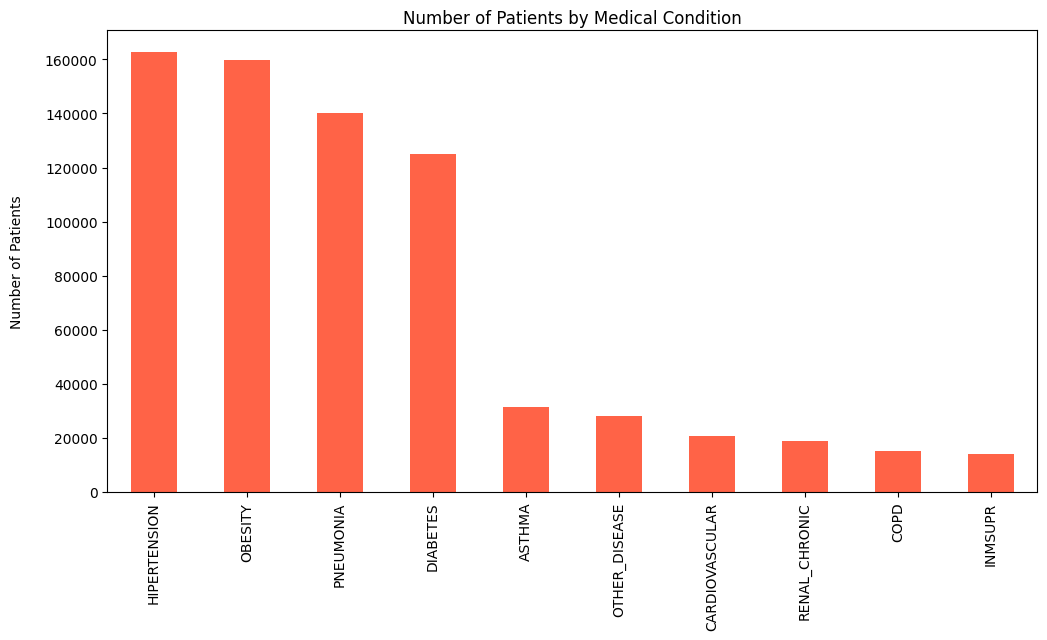

In [39]:
# List of conditions
conditions = ['DIABETES', 'HIPERTENSION', 'OBESITY', 'COPD', 'ASTHMA', 'INMSUPR',
              'CARDIOVASCULAR', 'RENAL_CHRONIC', 'PNEUMONIA', 'OTHER_DISEASE']

# Count the number of patients with each condition
condition_counts = df[conditions].apply(lambda x: (x == 1).sum(), axis=0)

# Plot the count of patients with each condition
condition_counts.sort_values(ascending=False).plot(kind='bar', figsize=(12,6), color='tomato')
plt.title("Number of Patients by Medical Condition", pad = 5)
plt.ylabel("Number of Patients", labelpad = 15)
plt.show()

## Percentage of Patients with Medical Conditions

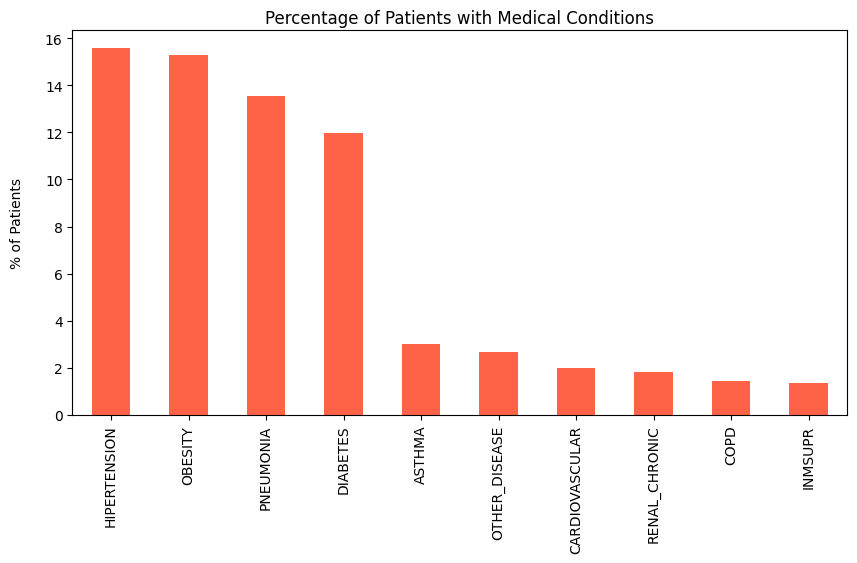

In [18]:
# Replace 2 with 0 for "no" in condition columns
df[conditions] = df[conditions].replace(2, 0)

# Calculate the prevalence of medical conditions among patients
prevalence_percentage = df[conditions].mean().sort_values(ascending=False).mul(100)

# Plot the chart
prevalence_percentage.plot(kind='bar', figsize=(10, 5), color='tomato')
plt.title("Percentage of Patients with Medical Conditions", pad=5)
plt.ylabel("% of Patients", labelpad=15)
plt.show()

# 📊 Survival Analysis 📊

## Mortality by Age

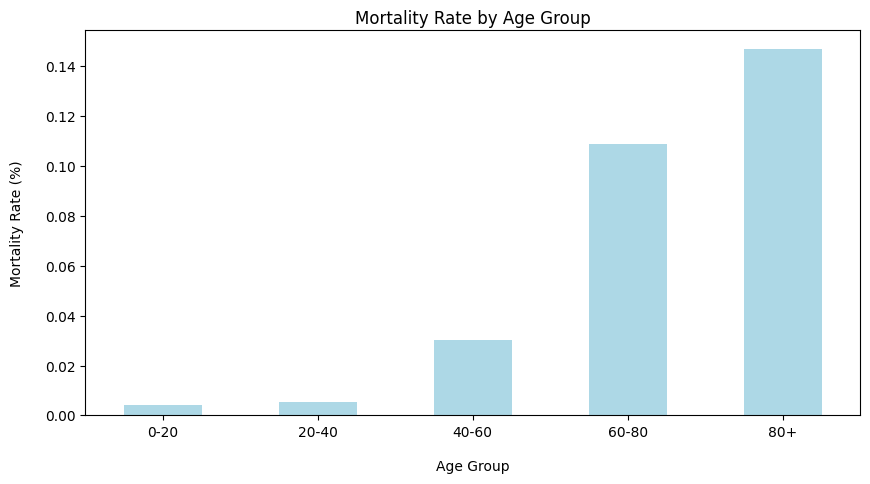

In [41]:
### Group by age bins and calculate the mean mortality rate
age_labels = ['0-20', '20-40', '40-60', '60-80', '80+']
mortality_by_age = df.groupby(pd.cut(df['AGE'], bins=[0,20,40,60,80,120], labels=age_labels))['DIED'].mean()

# Plot the chart
mortality_by_age.plot(kind='bar', color = 'lightblue', figsize=(10,5))

plt.title("Mortality Rate by Age Group", pad = 5)
plt.xlabel("Age Group", labelpad = 15)
plt.ylabel("Mortality Rate (%)", labelpad = 15)
plt.xticks(rotation=0)  # Optional: to keep the x-axis labels horizontal
plt.show()

## Mortality by Medical Condition

In [20]:
# Function to calculate mortality rate for each condition
def calculate_mortality_rate(df, conditions):
    mortality_rates = {}
    
    for column in conditions:
        # For each condition, calculate the mortality rate when condition is present (1) vs absent (0)
        try:
            # Filter out NaN values from the condition column
            valid_data = df[df[column].notna()]
            
            # Patients with the condition (value = 1)
            condition_present = df[df[column] == 1]
            mortality_rate_present = condition_present['DIED'].mean() * 100
            
            # Patients without the condition (value = 0)
            condition_absent = df[df[column] == 0]
            mortality_rate_absent = condition_absent['DIED'].mean() * 100
            
            mortality_rates[column] = {
                'With Condition': mortality_rate_present,
                'Without Condition': mortality_rate_absent
            }
        except:
            print(f"Could not calculate mortality rate for {column}")
    
    return mortality_rates

# Calculate mortality rates
mortality_rates = calculate_mortality_rate(df, conditions)

# Convert to dataframe for easier plotting
mortality_df = pd.DataFrame({
    'Condition': [],
    'Status': [],
    'Mortality Rate (%)': []
})

for condition, rates in mortality_rates.items():
    mortality_df = pd.concat([mortality_df, pd.DataFrame({
        'Condition': [condition, condition],
        'Status': ['With Condition', 'Without Condition'],
        'Mortality Rate (%)': [rates['With Condition'], rates['Without Condition']]
    })], ignore_index=True)
    
# View the dataframe
mortality_df

,Condition,Status,Mortality Rate (%)
0,DIABETES,With Condition,8.978390
1,DIABETES,Without Condition,2.063466
2,HIPERTENSION,With Condition,7.809303
3,HIPERTENSION,Without Condition,1.983252
4,OBESITY,With Condition,4.269285
5,OBESITY,Without Condition,2.638059
6,COPD,With Condition,10.602842
7,COPD,Without Condition,2.776489
8,ASTHMA,With Condition,1.925757
9,ASTHMA,Without Condition,2.920246


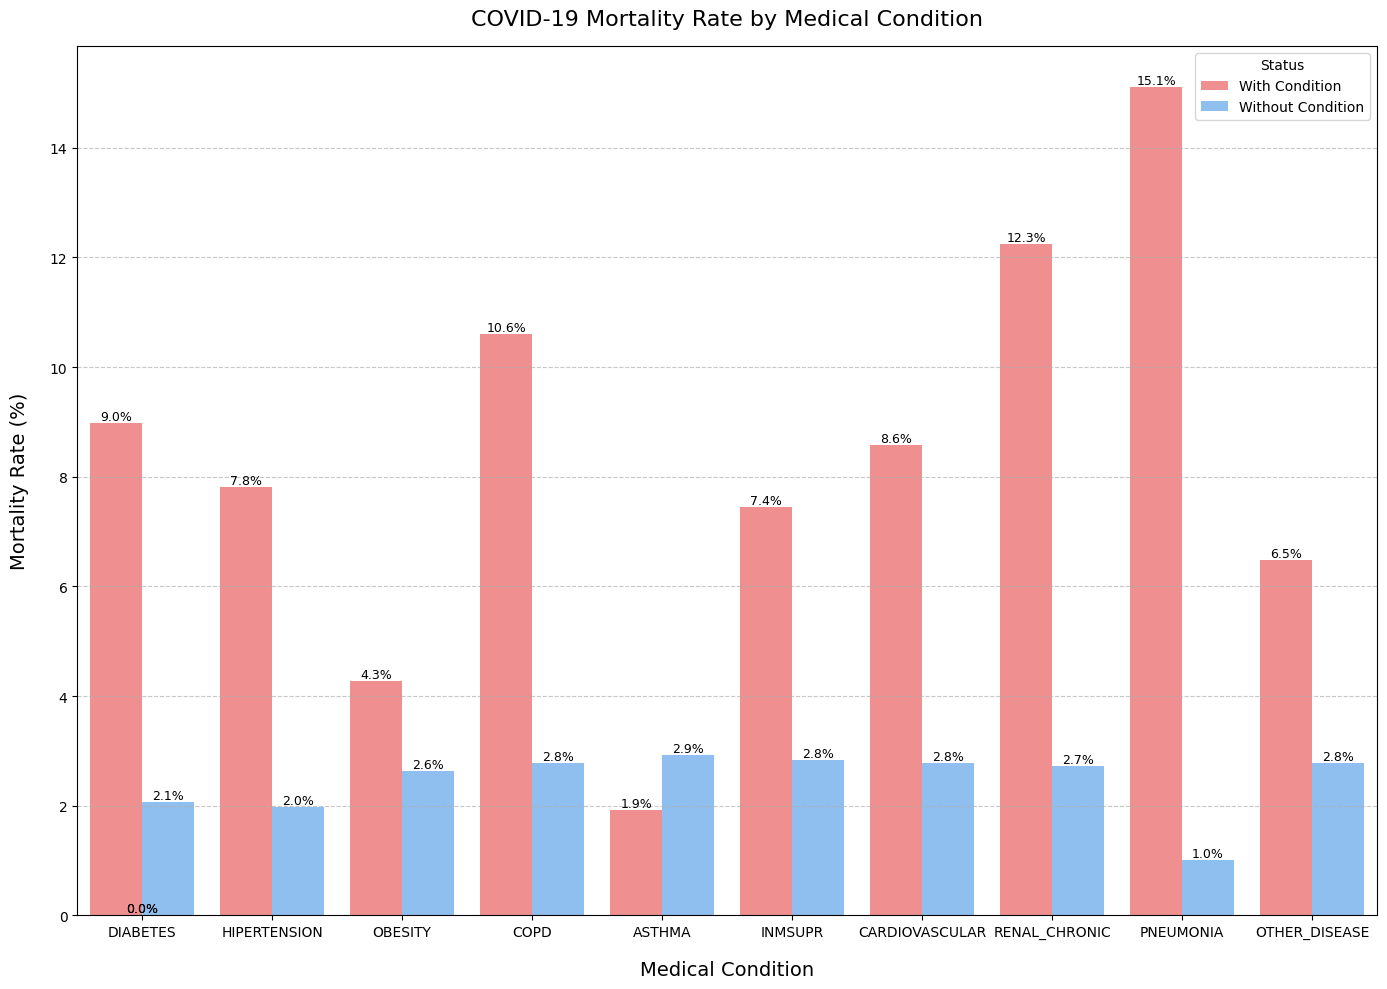

In [21]:
# Plot the chart
plt.figure(figsize=(14, 10))
chart = sns.barplot(
    x='Condition', 
    y='Mortality Rate (%)', 
    hue='Status',
    data=mortality_df,
    palette=['#ff7f7f', '#7fbfff']
)

plt.title('COVID-19 Mortality Rate by Medical Condition', fontsize=16, pad = 15)
plt.xlabel('Medical Condition', fontsize=14, labelpad = 15)
plt.ylabel('Mortality Rate (%)', fontsize=14, labelpad = 15)
plt.legend(title='Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on the bars
for p in chart.patches:
    chart.annotate(
        f'{p.get_height():.1f}%', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom', 
        fontsize=9
    )

plt.tight_layout()
plt.show()

## Survival by Medical Unit 

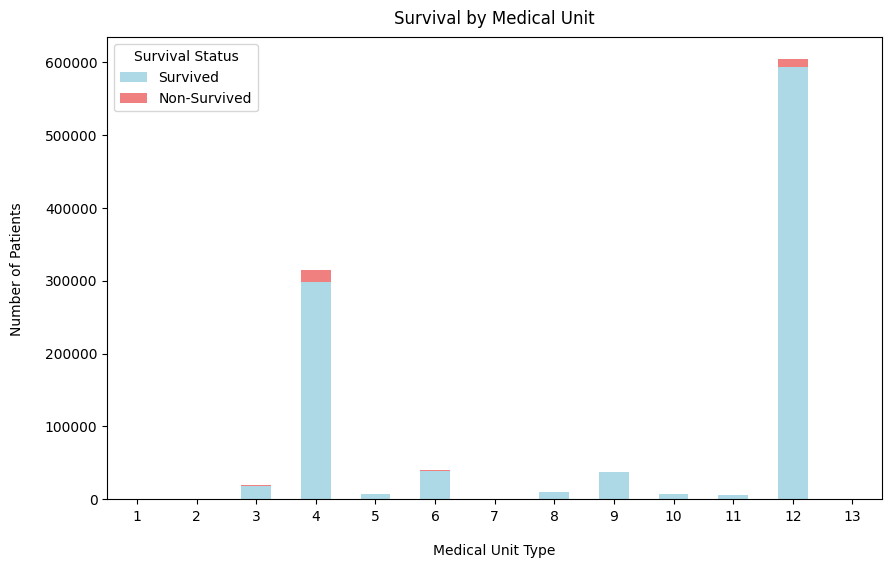

In [22]:
medical_unit_survival = df.groupby(['MEDICAL_UNIT', 'DIED']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
medical_unit_survival.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'lightcoral'])

plt.title("Survival by Medical Unit", pad=10)
plt.xlabel("Medical Unit Type", labelpad=15)
plt.ylabel("Number of Patients", labelpad=15)

plt.legend(title="Survival Status", labels=["Survived", "Non-Survived"])
plt.xticks(rotation=0)
plt.show()

## Survival by Intubation Status

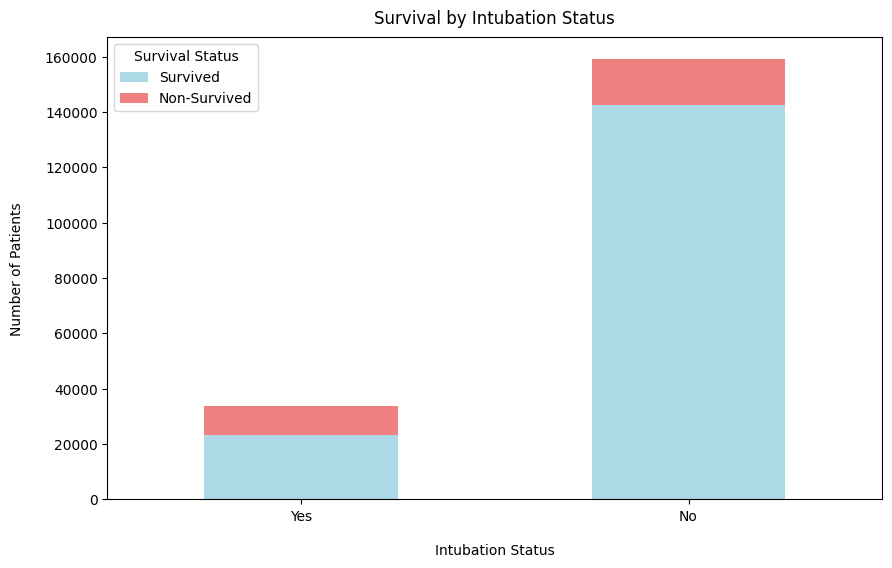

In [23]:
intubation_survival = df.groupby(['INTUBED', 'DIED']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
label_mapping = {1: 'Yes', 2: 'No'}
intubation_survival.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'lightcoral'])

plt.title("Survival by Intubation Status", pad=10)
plt.xlabel("Intubation Status", labelpad=15)
plt.ylabel("Number of Patients", labelpad=15)

plt.legend(title="Survival Status", labels=["Survived", "Non-Survived"])
plt.xticks(ticks=[0, 1], labels=['Yes', 'No'], rotation=0)
plt.show()

## Survival by Emergency Health Unit Level

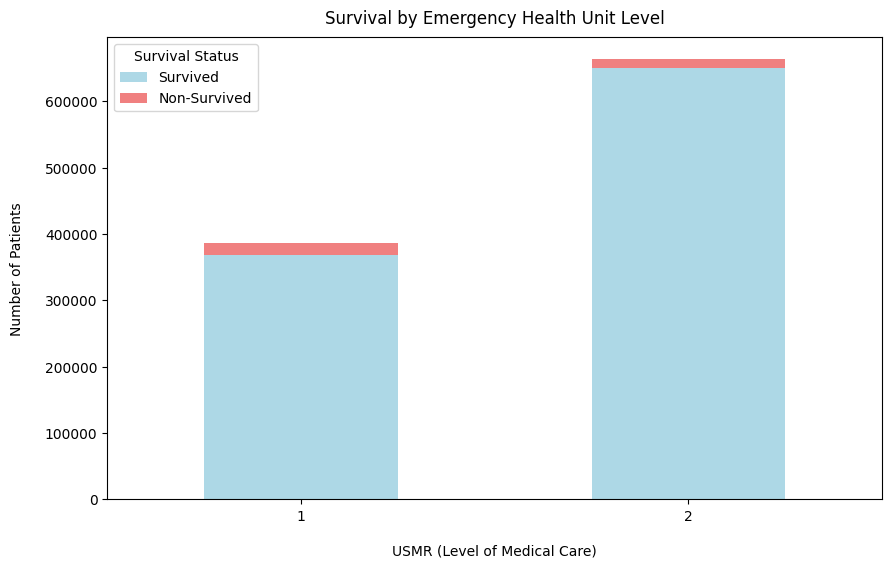

In [24]:
usmr_survival = df.groupby(['USMER', 'DIED']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
usmr_survival.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'lightcoral'])

plt.title("Survival by Emergency Health Unit Level", pad=10)
plt.xlabel("USMR (Level of Medical Care)", labelpad=15)
plt.ylabel("Number of Patients", labelpad=15)

plt.legend(title="Survival Status", labels=["Survived", "Non-Survived"])
plt.xticks(rotation=0)
plt.show()

## Survival by ICU Admission

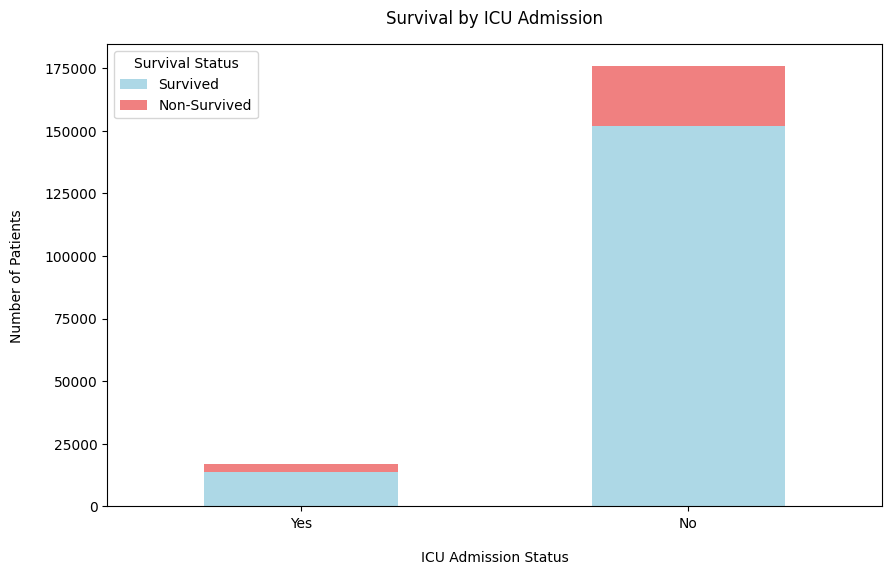

In [25]:
icu_survival = df.groupby(['ICU', 'DIED']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
label_mapping = {1: 'Yes', 2: 'No'}
icu_survival.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'lightcoral'])

plt.title("Survival by ICU Admission", pad=15)
plt.xlabel("ICU Admission Status", labelpad=15)
plt.ylabel("Number of Patients", labelpad=15)

plt.legend(title="Survival Status", labels=["Survived", "Non-Survived"])
plt.xticks(ticks=[0, 1], labels=['Yes', 'No'], rotation=0)
plt.show()

# 📊 Time Series Analysis 📊 

## Deaths by Month

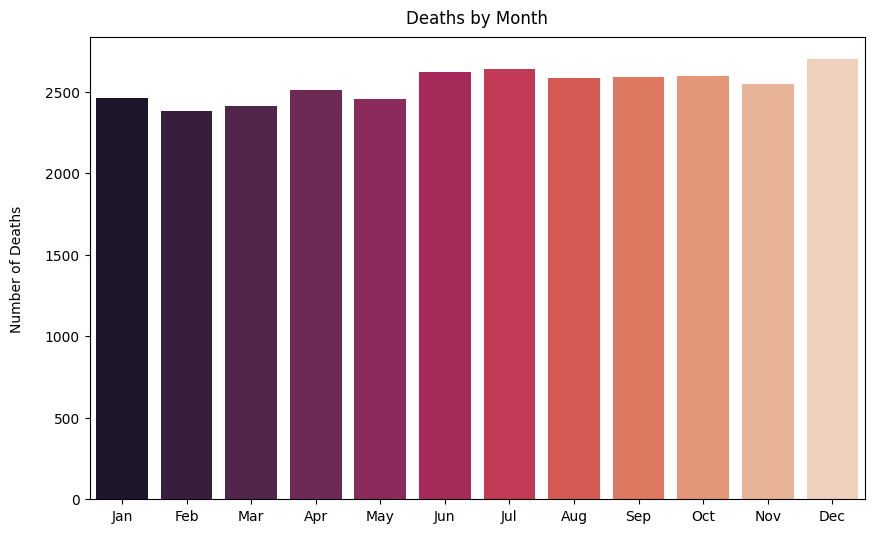

In [31]:
# Count deaths by month
deaths_by_month = df_deaths.groupby('Month').size()

# Plot deaths by month
plt.figure(figsize=(10, 6))
sns.barplot(x=deaths_by_month.index, y=deaths_by_month.values, palette="rocket")
plt.title("Deaths by Month", pad = 10)
plt.xlabel("")
plt.ylabel("Number of Deaths", labelpad = 15)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

## Heatmap: Deaths Over Time by Month and Year

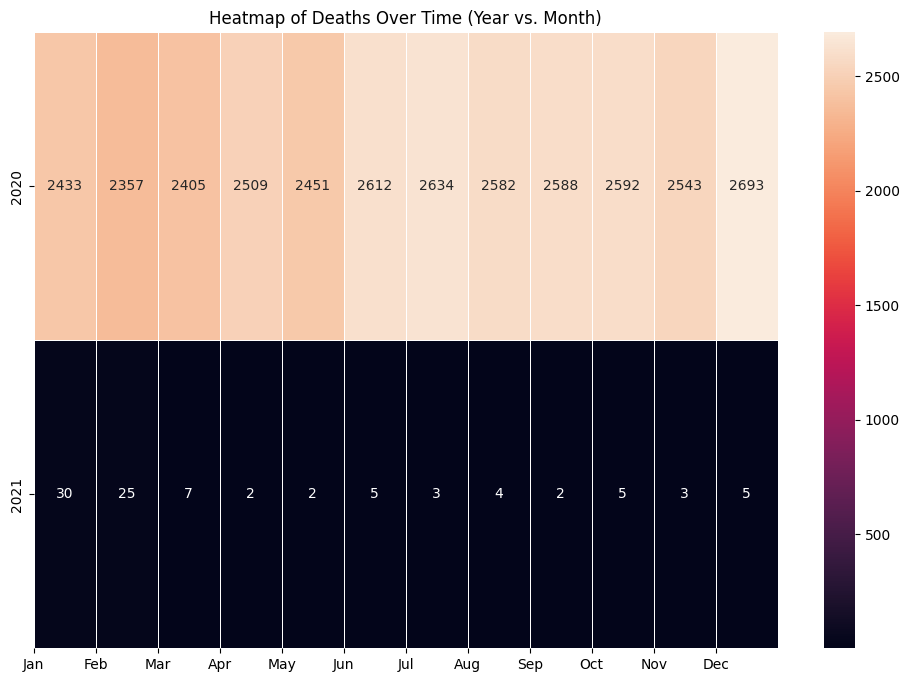

In [35]:
# Count the number of deaths by year and month
deaths_by_time = df_deaths.groupby(['Year', 'Month']).size().unstack()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(deaths_by_time, annot=True, fmt='d', linewidths=.5)

plt.title("Heatmap of Deaths Over Time (Year vs. Month)")
plt.xlabel("")
plt.ylabel("")
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()